In [1]:
from scipy.io import wavfile
import os
import matplotlib.pyplot as plt

import bandstop

# Filtering a Single File

In [2]:
filename = os.path.join('GY01', 'test.wav')
samplerate, data = wavfile.read(filename)
is_stereo = len(data.shape) == 2
fcenter = 5000
bwidth = 250 
order = 1

<ipython-input-2-4ad4b142b113>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(filename)


Using Second Order Sections (SOS) is said to have "fewer numerical problems." This is the default filtering method.

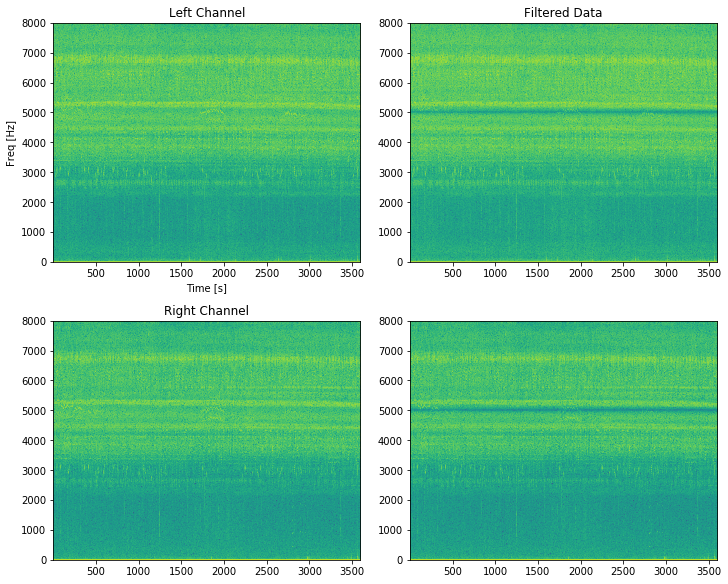

In [3]:
sosfilter = bandstop.design_bandstop_butter_filter(fcenter, bwidth, order, samplerate, sos=True)
filt_data_sos = bandstop.bandstop_butter_sos(data, sosfilter, stereo=is_stereo)
bandstop.plot_specgrams(data, filt_data_sos, samplerate, stereo=is_stereo)

# Filtering Directory of .wav files
Only need to specify directory name relative to current directory. 
Optionally, you can enter a new directory to save filtered data to, using the same file names as the original data.

In [4]:
#specify list of frequencies to filter the signals at
fcenter = [4000, 5000, 6000, 7000]
signals = bandstop.filter_all_files('GY01', fcenter, bwidth, order, new_dirname='new_dir' )
for file, sig in signals.items():
    print(file)

/Users/juan/Documents/CSE/145/proj/bandstop.py:165: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sig = wavfile.read(os.path.join(dirname, filename))


S4A03418_20180811_195008.wav
S4A03418_20180811_185008.wav
test.wav
